In [1]:
import sys
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

# AnalyzeResults


## Load data

In [2]:
many4j_projects = pd.read_csv(results_path+'Many4JResults.csv') 

## Change days to years

In [3]:
many4j_projects['Age'] = many4j_projects['Age'].map(lambda days: days/365.) 

## 1. Size Analysis (# commits)

In [4]:
def scatterPlot(x_value):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,3))
    ax1.scatter(x=many4j_projects[x_value], y=many4j_projects["FullyTestability_A"], label="Many4J")
    ax2.scatter(x=many4j_projects[x_value], y=many4j_projects["FullyTestability_T"], label="Many4J")
    ax3.scatter(x=many4j_projects[x_value], y=many4j_projects["TestabilityRate_A"], label="Many4J")
    ax4.scatter(x=many4j_projects[x_value], y=many4j_projects["TestabilityRate_T"], label="Many4J")

    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax3.set_xscale('log')
    ax4.set_xscale('log')
    
    ax1.set_title("FullyTestability_A")
    ax2.set_title("FullyTestability_T")
    ax3.set_title("TestabilityRate_A")
    ax4.set_title("TestabilityRate_T")

    plt.legend()
    plt.legend()
    plt.legend()
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("latex_figures/"+x_value+"-scatterplot.pdf")
    plt.show(block=True);

In [5]:
alpha = 5e-2
def isNormalDistribution(name, data):
    k2, p = stats.normaltest(list(data.values))
    
    if p < alpha: 
        print("{:s} is NOT a normal distribution: p = {:g}".format(name, p))
    else: 
        print("{:s} is a normal distribution: p = {:g}".format(name, p))

In [6]:
def describeResults(metric,dataset, name, data):
    return [
        dataset,
        name,
        len(data.index),
        data[metric].mean(),
        100*data['Source buildability'].mean(),
        100*data['Test buildability_A'].mean(),
        100*data['TestabilityRate_A'].mean(),
        100*data['TestabilityRate_T'].mean(),
        100*data['FullyTestability_A'].mean(),
        100*data['FullyTestability_T'].mean(),
    ]

In [7]:
def describeResultsByQuartile(metric, dataset, df):

    q1 = df[metric].quantile(0.25)
    short_df = df[ df[metric]< q1 ]
    short_summary = describeResults(metric,dataset,"Short",short_df)
    
    q3 = df[metric].quantile(0.75)
    medium_df = df.query("`%s` >= %d and `%s` < %d"%(metric,q1,metric, q3))
    medium_summary = describeResults(metric,dataset,"Medium",medium_df)
    
    large_df = df[ df[metric] >= q3 ]
    large_summary = describeResults(metric,dataset,"Large",large_df)
    
    all_df = describeResults(metric,dataset,"All", df)
    
    summary = [short_summary, medium_summary, large_summary] #, all_df]
    
    print(dataset)
    print("Q1: %d"%q1)
    print("Q3: %d"%q3)
    
    returned_df = pd.DataFrame(summary, columns = [
        "Dataset",
        "",
        "# of projects",
        metric+" Mean",
        "Source buildability",
        "Test buildability",
        "TestabilityRate_A",
        "TestabilityRate_T",
        "FullyTestability_A",
        "FullyTestability_T",
    ]).round(decimals=2)
    return returned_df

In [8]:
def allDescriptiobByDataset(metric):
    return pd.concat([
        describeResultsByQuartile(metric, "Many4j",many4j_projects)
    ], ignore_index=True).set_index(['Dataset', '']).T

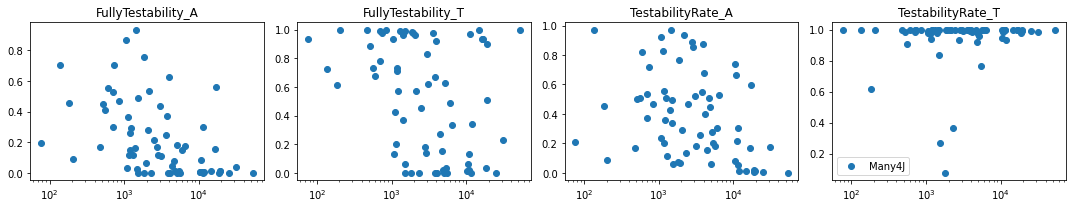

In [9]:
scatterPlot('Total Commits')

In [10]:
allDescriptiobByDataset('Total Commits')

Many4j
Q1: 1189
Q3: 6331


Dataset              Many4j                   
                      Short   Medium     Large
# of projects         17.00    32.00     17.00
Total Commits Mean   667.12  3062.06  17544.24
Source buildability   59.71    53.54     23.10
Test buildability     52.93    46.67     21.23
TestabilityRate_A     50.35    41.71     21.10
TestabilityRate_T     96.15    90.58     98.81
FullyTestability_A    38.54    20.88      8.05
FullyTestability_T    74.80    45.49     43.49

## 2. Age Analysis (# years)

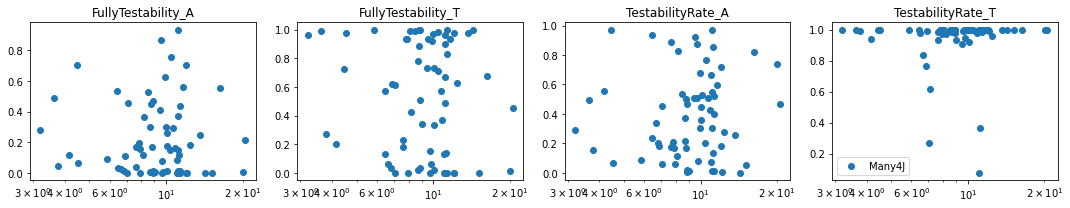

In [11]:
scatterPlot('Age')

In [12]:
allDescriptiobByDataset('Age')

Many4j
Q1: 7
Q3: 11


Dataset             Many4j              
                     Short Medium  Large
# of projects        17.00  32.00  17.00
Age Mean              5.88   9.03  13.39
Source buildability  48.97  46.78  45.32
Test buildability    41.24  40.84  42.77
TestabilityRate_A    37.10  38.67  41.19
TestabilityRate_T    89.95  94.76  95.72
FullyTestability_A   19.79  23.50  23.31
FullyTestability_T   50.02  54.24  50.47

## 3. LoC Analysis (# LoC)

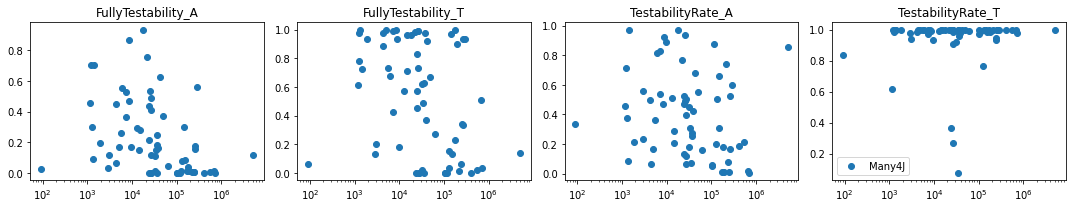

In [13]:
scatterPlot('LoC')

In [14]:
allDescriptiobByDataset('LoC')

Many4j
Q1: 8037
Q3: 135429


Dataset               Many4j                     
                       Short    Medium      Large
# of projects          16.00     32.00      16.00
LoC Mean             3366.88  41151.53  610771.19
Source buildability    56.80     53.41      31.43
Test buildability      47.92     47.74      28.71
TestabilityRate_A      45.13     42.81      28.56
TestabilityRate_T      95.53     90.78      98.78
FullyTestability_A     31.32     25.32       9.29
FullyTestability_T     69.40     50.10      40.82

## 4. All Analysis

In [15]:
def allDescription():
    return pd.concat([
        describeResultsByQuartile('Total Commits', 'Total Commits',many4j_projects),
        describeResultsByQuartile('Age', 'Age',many4j_projects),
        describeResultsByQuartile('LoC', 'LoC',many4j_projects)
    ], ignore_index=True).set_index(['Dataset', '']).T

In [16]:
allDescription()

Total Commits
Q1: 1189
Q3: 6331
Age
Q1: 7
Q3: 11
LoC
Q1: 8037
Q3: 135429


Dataset             Total Commits                       Age                \
                            Short   Medium     Large  Short Medium  Large   
# of projects               17.00    32.00     17.00  17.00  32.00  17.00   
Total Commits Mean         667.12  3062.06  17544.24    NaN    NaN    NaN   
Source buildability         59.71    53.54     23.10  48.97  46.78  45.32   
Test buildability           52.93    46.67     21.23  41.24  40.84  42.77   
TestabilityRate_A           50.35    41.71     21.10  37.10  38.67  41.19   
TestabilityRate_T           96.15    90.58     98.81  89.95  94.76  95.72   
FullyTestability_A          38.54    20.88      8.05  19.79  23.50  23.31   
FullyTestability_T          74.80    45.49     43.49  50.02  54.24  50.47   
Age Mean                      NaN      NaN       NaN   5.88   9.03  13.39   
LoC Mean                      NaN      NaN       NaN    NaN    NaN    NaN   

Dataset                  LoC                       
                       Short    Medium      Large  
# of projects          16.00     32.00      16.00  
Total Commits Mean       NaN       NaN        NaN  
Source buildability    56.80     53.41      31.43  
Test buildability      47.92     47.74      28.71  
TestabilityRate_A      45.13     42.81      28.56  
TestabilityRate_T      95.53     90.78      98.78  
FullyTestability_A     31.32     25.32       9.29  
FullyTestability_T     69.40     50.10      40.82  
Age Mean                 NaN       NaN        NaN  
LoC Mean             3366.88  41151.53  610771.19

## 4.1 Test normality distribution of testability

In [17]:
isNormalDistribution("TestabilityRate_A", many4j_projects['TestabilityRate_A'])
isNormalDistribution("TestabilityRate_T", many4j_projects['TestabilityRate_T'])
isNormalDistribution("FullyTestability_A", many4j_projects['FullyTestability_A'])
isNormalDistribution("FullyTestability_T", many4j_projects['FullyTestability_T'])

TestabilityRate_A is NOT a normal distribution: p = 0.0218755
TestabilityRate_T is NOT a normal distribution: p = 1.48306e-18
FullyTestability_A is NOT a normal distribution: p = 0.00180761
FullyTestability_T is NOT a normal distribution: p = 1.19995e-33


## 4.2 Correlation

In [18]:
testabilities = [
    'TestabilityRate_A', 
    'TestabilityRate_T',
    'FullyTestability_A', 
    'FullyTestability_T',
]
metrics = [
    'Total Commits',
    'Age',
    'LoC'
]
values = [
    'corr',
    'pvalue'
]
results = {}

for metric in metrics:
    results[metric+" corr"] = {}
    results[metric+" pvalue"] = {}
    for testability in testabilities:
        corr, pvalue = stats.spearmanr(many4j_projects[testability], many4j_projects[metric])
        for v in values:
            results[metric+" corr"][testability] = round(corr,3)
            results[metric+" pvalue"][testability] = round(pvalue,3)

pd.DataFrame(results)

,Total Commits corr,Total Commits pvalue,Age corr,Age pvalue,LoC corr,LoC pvalue
TestabilityRate_A,-0.414,0.001,0.048,0.705,NaN,NaN
TestabilityRate_T,0.082,0.512,0.178,0.153,NaN,NaN
FullyTestability_A,-0.548,0.000,-0.070,0.574,NaN,NaN
FullyTestability_T,-0.346,0.004,-0.086,0.492,NaN,NaN


## 5. Testability per projects

In [19]:
def getProjectsByMetric(dataset, metric, percent, comp):
    if comp == 'greater':
        return dataset[ dataset[metric] >= percent ]
    else:
        return dataset[ dataset[metric] <= percent ]

def getProjectsByTestability(dataset, comp):
    return [ 
        len(getProjectsByMetric(dataset, "FullyTestability_A", 0.30, comp).index),
        len(getProjectsByMetric(dataset, "FullyTestability_T", 0.98, comp).index),
    ]

## 5.1 Best projects per Testability (count)

In [20]:
many4j_best = getProjectsByTestability(many4j_projects, "greater")
pd.DataFrame([
    ["Many4J"] + many4j_best
], columns = [
        "Dataset",
        "FullyTestability_A",
        "FullyTestability_T",
]).T

,0
Dataset,Many4J
FullyTestability_A,18
FullyTestability_T,9


In [21]:
def topProjectsBy(dataset, metric):
    return (dataset.sort_values(by=metric, ascending=False).round(decimals=2).head(6)
            #[['Project', 'Dataset', 'Age', 'LoC', 'Total Commits']]
            #.set_index(['Project'])
           )

## 5.2 Best projects per Testability (Details)

### Best Projects (Testability C)

In [22]:
topProjectsBy(many4j_projects,'FullyTestability_A').head(3).T

,5,19,17
Project,jsoup,spark,retrofit
Dataset,ManySStub4J,ManySStub4J,ManySStub4J
Age,11.12,9.55,10.48
LoC,17831.0,8655.0,22003.0
Total Commits,1442,1062,1865
Source buildable commits,1410,1051,1431
Source buildability,0.98,0.99,0.77
Test buildable commits,1403,986,1431
Test buildability_A,0.97,0.93,0.77
Test buildability_S,1.0,0.94,1.0


### Best Projects (Testability T)

In [24]:
topProjectsBy(many4j_projects,'FullyTestability_T').head(3).T

,64,3,1
Project,camel,jfinal,javapoet
Dataset,ManySStub4J,ManySStub4J,ManySStub4J
Age,14.28,8.78,8.88
LoC,NaN,4977.0,8306.0
Total Commits,53286,473,846
Source buildable commits,21,360,398
Source buildability,0.0,0.76,0.47
Test buildable commits,20,79,396
Test buildability_A,0.0,0.17,0.47
Test buildability_S,0.95,0.22,0.99
